In [192]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import re

In [193]:
df = pd.read_csv(r"C:\Users\Hp\Desktop\daraz_data.csv" )
df

,Unnamed: 0,Name,Rating,Number of Ratings,Price
0,0,Redmi A2+ 3GB - 64GB 5000mAh 10W fast charging...,4.7/5,(240),"19,299"
1,1,"Redmi 13C 6GB RAM-128GB ROM 6.74"" Dot Drop d...",4.8/5,(13),"32,999"
2,2,Redmi A2+ || 3GB Ram 64GB Rom || 5000mAh Batte...,4.7/5,(156),"19,499"
3,3,Infinix Note 30 RAM 8GB+8GB & 256GB Storage 6....,4.5/5,(82),"40,899"
4,4,Tecno SPARK 10C 4GB RAM -128GB ROM 5000mAh PT...,4.6/5,(118),"28,449"
...,...,...,...,...,...
1490,1490,Redmi note 12 8GB RAM -128GB ROM PTA APPROVED ...,5/5,(1),"47,999"
1491,1491,Tecno Pova 5 Pro 5G - 8+8GB RAM 256GB ROM 6.78...,5/5,(1),"59,980"
1492,1492,Xiaomi Poco C 65 RAM 6 GB ROM 128 GB Front Cam...,5/5,(1),"39,999"
1493,1493,"Tecno Spark Go 2024 , 4GB RAM 64GB ROM , Back ...",5/5,(1),"26,499"


In [194]:
print("DataFrame Information:")
print("-" * 30)
print('DF Shape: ' ,df.shape)
print('number of Columns: ' ,len(df.columns))
print('number of Observations: ' ,len(df))
print('Number of values in df: ' , df.count().sum())
print('Total Number of Missing values in df: ' , df.isna().sum().sum())
print('percentage of Missing values : ' ,  "{:.2f}".format(df.isna().sum().sum()/df.count().sum() *100),'%')
print('Total Number of Duplicated records in df : ' , df.duplicated().sum().sum())
print('percentage of Duplicated values : ' ,  "{:.2f}".format(df.duplicated().sum().sum()/df.count().sum() *100),'%')

DataFrame Information:
------------------------------
DF Shape:  (1495, 5)
number of Columns:  5
number of Observations:  1495
Number of values in df:  7475
Total Number of Missing values in df:  0
percentage of Missing values :  0.00 %
Total Number of Duplicated records in df :  0
percentage of Duplicated values :  0.00 %


In [195]:
df.drop('Unnamed: 0' , axis= 1 , inplace=True)

In [196]:
df['Name'] = df['Name'].str.lower()

In [197]:
df['Name']

0       redmi a2+ 3gb - 64gb 5000mah 10w fast charging...
1       redmi 13c  6gb ram-128gb rom  6.74" dot drop d...
2       redmi a2+ || 3gb ram 64gb rom || 5000mah batte...
3       infinix note 30 ram 8gb+8gb & 256gb storage 6....
4       tecno spark 10c  4gb ram -128gb rom 5000mah pt...
                              ...                        
1490    redmi note 12 8gb ram -128gb rom pta approved ...
1491    tecno pova 5 pro 5g - 8+8gb ram 256gb rom 6.78...
1492    xiaomi poco c 65 ram 6 gb rom 128 gb front cam...
1493    tecno spark go 2024 , 4gb ram 64gb rom , back ...
1494    itel a27 4g || 2gb ram 32gb rom || 4000mah bat...
Name: Name, Length: 1495, dtype: object

In [198]:
def brand(input):
    x = re.sub(r'[.-]', '', input.split()[0])
    if x in ['s9', 's6', 's3']:
        return 'sparx'
    elif x == 'moto':
        return 'motorola'
    elif x == 'iphone':
        return 'apple'
    elif x in ['spark', 'tecn']:
        return 'tecno'
    elif x == 'galaxy':
        return 'samsung'
    elif x in ['zero' , 'hot']:
        return 'infinix'
    elif x == 'n':
        return 'neo'
    elif x == 'itela60s':
        return 'itel'
    elif x == 'dcode':
        return 'decode'
    elif x == 'a17':
        return 'oppo'
    elif x == 'vgo':
        return 'vgotel'
    else:
        return x

df['Brand'] = df['Name'].apply(brand)
df['Brand'].unique()

array(['redmi', 'infinix', 'tecno', 'samsung', 'vivo', 'xiaomi', 'realme',
       'imported', 'oppo', 'sparx', 'itel', 'neo', 'vgotel', 'nokia',
       'etachi', 'b', 'calme', 'zte', '(phone', 'decode', 'google',
       'sony', 'motorola', 'digit', 'kxd', 'x', 'apple', 'honor',
       'oneplus', 'gfive', 'vnus', 'qmobile', 'aquos', 'fujitsu',
       'huawei', 'xsmart', 'poco'], dtype=object)

In [199]:
def s_size(input):
    pattern = r'(\d+(\.\d{1,2})?)"\s*'
    match = re.search(pattern, input)
    if match:
        f = match.group(1)
        return float(f)
    else:
        return None
    
def rom(input):
    pattern = r'(\w+)\s*gb'
    match = re.findall(pattern, input.lower())
    if match:
        return float(max(match, key=len))
    else:
        return None

def ram(input):
    pattern = r'(\w+)\s*gb'
    match = re.findall(pattern, input.lower())
    if len(match) >= 2:
        return float(min(match, key=len))
    else:
        return None
    
def battery(input):
    pattern = r'(\w+)\s*mah'
    match = re.search(pattern, input)
    if match:
        f = match.group(1)
        pattern = r'\d+'
        match = re.search(pattern, f)
        return float(match.group(0))
    else:
        return None
def fast_charging(input):
    if pd.Series(input).str.contains('fast|\d+w').any():
        return 'Yes'
    else: return 'No'

def warranty(input):
    if pd.Series(input).str.contains('warranty').bool():
        return 'Yes'
    else: return 'No'
    
df['Screen_Size'] = df['Name'].apply(s_size)
df['Battery'] = df['Name'].apply(battery)
df['ROM'] = df['Name'].apply(rom)
df['RAM'] = df['Name'].apply(ram)
df['Fast Charging'] = df['Name'].apply(fast_charging)
df['Warrnaty'] = df["Name"].apply(warranty)
df['Rating'] = df['Rating'].str.replace('/5', '').astype(float)
df['Number of Ratings'] = df['Number of Ratings'].str.replace(r'\(|\)', '', regex=True).astype(int)
df['Price'] = df['Price'].apply(lambda x: int(x.replace(',', '')))
df


,Name,Rating,Number of Ratings,Price,Brand,Screen_Size,Battery,ROM,RAM,Fast Charging,Warrnaty
0,redmi a2+ 3gb - 64gb 5000mah 10w fast charging...,4.7,240,19299,redmi,NaN,5000.0,64.0,3.0,Yes,No
1,"redmi 13c 6gb ram-128gb rom 6.74"" dot drop d...",4.8,13,32999,redmi,6.74,5000.0,128.0,6.0,No,Yes
2,redmi a2+ || 3gb ram 64gb rom || 5000mah batte...,4.7,156,19499,redmi,NaN,5000.0,64.0,3.0,No,No
3,infinix note 30 ram 8gb+8gb & 256gb storage 6....,4.5,82,40899,infinix,6.78,5000.0,256.0,8.0,No,Yes
4,tecno spark 10c 4gb ram -128gb rom 5000mah pt...,4.6,118,28449,tecno,NaN,5000.0,128.0,4.0,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...
1490,redmi note 12 8gb ram -128gb rom pta approved ...,5.0,1,47999,redmi,NaN,NaN,128.0,8.0,Yes,Yes
1491,tecno pova 5 pro 5g - 8+8gb ram 256gb rom 6.78...,5.0,1,59980,tecno,NaN,5000.0,256.0,8.0,Yes,No
1492,xiaomi poco c 65 ram 6 gb rom 128 gb front cam...,5.0,1,39999,xiaomi,NaN,5000.0,128.0,6.0,No,No
1493,"tecno spark go 2024 , 4gb ram 64gb rom , back ...",5.0,1,26499,tecno,NaN,5000.0,64.0,4.0,No,No


In [200]:
print("DataFrame Information:")
print("-" * 30)
print('DF Shape: ' ,df.shape)
print('number of Columns: ' ,len(df.columns))
print('number of Observations: ' ,len(df))
print('Number of values in df: ' , df.count().sum())
print('Total Number of Missing values in df: ' , df.isna().sum().sum())
print('percentage of Missing values : ' ,  "{:.2f}".format(df.isna().sum().sum()/df.count().sum() *100),'%')
print('Total Number of Duplicated records in df : ' , df.duplicated().sum().sum())
print('percentage of Duplicated values : ' ,  "{:.2f}".format(df.duplicated().sum().sum()/df.count().sum() *100),'%')

DataFrame Information:
------------------------------
DF Shape:  (1495, 11)
number of Columns:  11
number of Observations:  1495
Number of values in df:  14663
Total Number of Missing values in df:  1782
percentage of Missing values :  12.15 %
Total Number of Duplicated records in df :  737
percentage of Duplicated values :  5.03 %


In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1495 entries, 0 to 1494
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               1495 non-null   object 
 1   Rating             1495 non-null   float64
 2   Number of Ratings  1495 non-null   int32  
 3   Price              1495 non-null   int64  
 4   Brand              1495 non-null   object 
 5   Screen_Size        317 non-null    float64
 6   Battery            1047 non-null   float64
 7   ROM                1465 non-null   float64
 8   RAM                1369 non-null   float64
 9   Fast Charging      1495 non-null   object 
 10  Warrnaty           1495 non-null   object 
dtypes: float64(5), int32(1), int64(1), object(4)
memory usage: 122.8+ KB


In [202]:
df.describe()

,Rating,Number of Ratings,Price,Screen_Size,Battery,ROM,RAM
count,1495.000000,1495.000000,1495.000000,317.000000,1047.000000,1465.000000,1369.000000
mean,4.586488,27.418729,43487.989967,8.804479,4927.731614,125.907167,5.674215
std,0.717997,55.777742,33161.944505,41.481799,481.724056,78.990961,4.116603
min,1.000000,1.000000,2525.000000,5.000000,500.000000,1.000000,1.000000
25%,4.500000,2.000000,25499.000000,6.500000,5000.000000,64.000000,4.000000
50%,4.800000,5.000000,34999.000000,6.600000,5000.000000,128.000000,4.000000
75%,5.000000,23.500000,46999.000000,6.700000,5000.000000,128.000000,8.000000
max,5.000000,362.000000,329999.000000,745.000000,8000.000000,512.000000,128.000000


In [203]:
df.describe(include='O')

,Name,Brand,Fast Charging,Warrnaty
count,1495,1495,1495,1495
unique,676,37,2,2
top,"redmi note 12 8gb ram 128gb rom, display size...",infinix,No,No
freq,11,211,1264,1211


In [204]:
df.nunique()

Name                 676
Rating                24
Number of Ratings     77
Price                380
Brand                 37
Screen_Size           30
Battery               25
ROM                   13
RAM                   10
Fast Charging          2
Warrnaty               2
dtype: int64

<Figure size 1000x600 with 0 Axes>

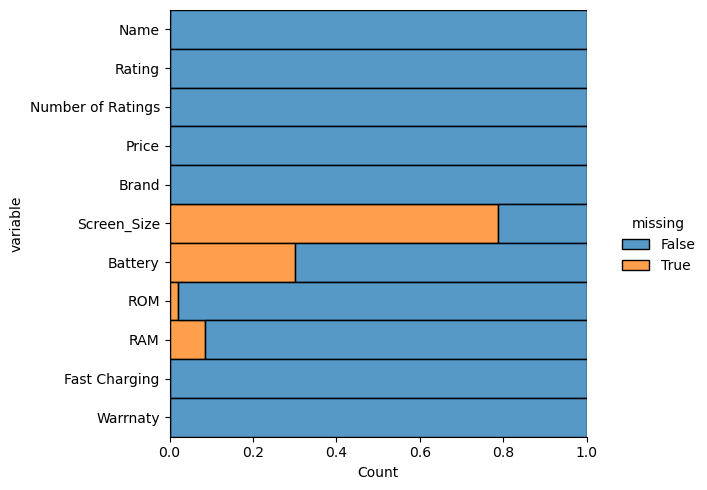

In [205]:
plt.figure(figsize=(10,6))
sns.displot(
    data=df.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)
plt.show()

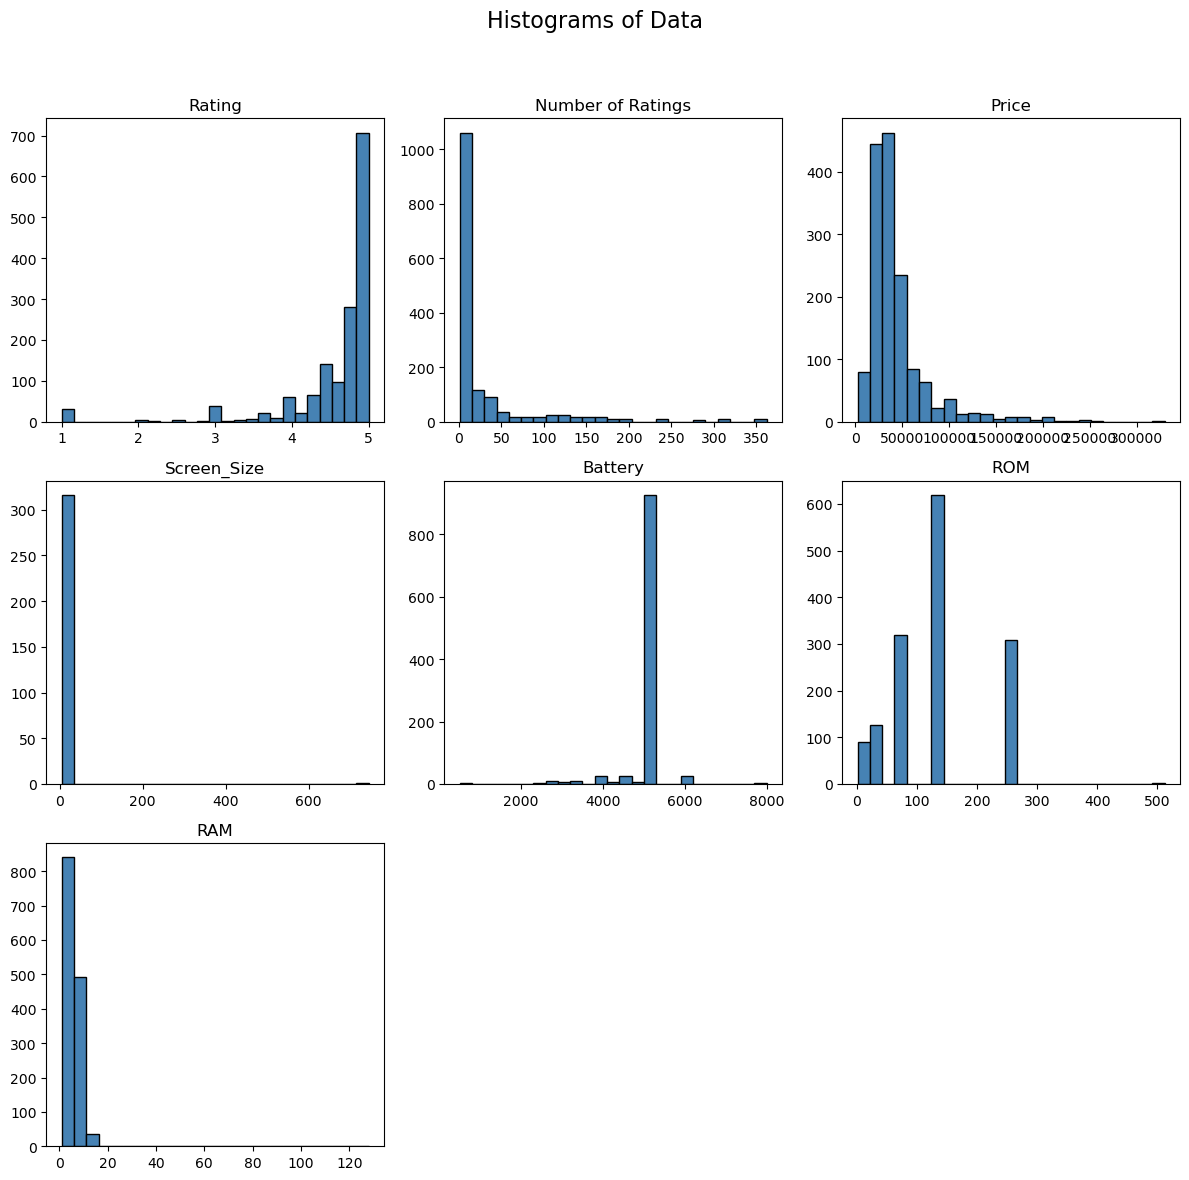

In [206]:
df.hist(bins = 25, color='steelblue', edgecolor='black', grid=False , figsize = (12, 12) )
# Add titles and labels
plt.suptitle('Histograms of Data', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust spacing between subplots
plt.xlabel('Value', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Modify tick font size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Remove outer spines
for spine in plt.gca().spines.values():
    spine.set_visible(False)


plt.show()

In [207]:
fig = make_subplots(rows=1, cols=3 ,subplot_titles=['Brand','Fast Charging','Warrnaty'])

# Add histograms
fig.add_trace(go.Histogram(x=df['Brand']), row=1, col=1)
fig.add_trace(go.Histogram(x=df['Fast Charging']), row=1, col=2)
fig.add_trace(go.Histogram(x=df['Warrnaty']), row=1, col=3)

# Show the plot
fig.show()

In [210]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2)
imputer.fit_transform(df)

ValueError: could not convert string to float: 'redmi a2+ 3gb - 64gb 5000mah 10w fast charging 6.52” hd+ dot drop display pta  approved  system active'

In [209]:
feature = ['Rating','Number of Ratings','Price','Screen_Size','Battery',	'ROM','RAM']

from sklearn.ensemble import IsolationForest
IF = IsolationForest(contamination=0.1 , random_state=42)
IF.fit(df[feature])
df['anomaly_scores'] = IF.decision_function(df[feature])
df['anomaly'] = IF.predict(df[feature])



ValueError: Input X contains NaN.
IsolationForest does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values